In [1]:
import scipy as sp
import scipy.optimize as optimize
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import sys
import os
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Scenario
Valuing lower bound load more

In [2]:
# The formula
'p = (T_p*S - T_s*L_s)/1.2 - L_g*T_g'

'p = (T_p*S - T_s*L_s)/1.2 - L_g*T_g'

In [3]:
def injection(x):
    """The injection function"""

    L_g = x[0]
    T_g = x[1]
    T_p = x[2]
    S = x[3]
    T_s = x[4]
    L_s = x[5]


    return (365*L_g*T_g - (T_p*S - 365*T_s*L_s)/1.2)

In [4]:
# Solar injection with credit is capped at 130% of consumption
def constraint1(x):
    return (1.1*365*x[0]*x[1] - (x[2]*x[3] - 365*x[4]*x[5])/1.2)
def constraint2(x): 
    return x[0]*x[1] - 0
def constraint3(x):
    return x[4]*x[5] - 0
Con1 = {'type':'ineq', 'fun':constraint1}
Con2 = {'type':'ineq', 'fun':constraint2}
Con3 = {'type':'ineq', 'fun':constraint3}
Cons = [Con1, Con2, Con3]

In [5]:
# Factor: kWh/kWp; 12 month; number obtained from Helioscope
B_T_p = (1173,1263)

# Load charged by Grid
B_L_g = (0, 338.5)
B_T_g = (2,10)
# Load charged by solar, bound
B_L_s = (0,488.5) 
B_T_s = (0, 6)


B_S_500 = (500,500)
B_S_520 = (520,520)
B_S_540 = (540,540)
B_S_560 = (560,560)
B_S_580 = (580,580)
B_S_600 = (600,600)



Bounds_500 = [B_L_g, B_T_g, 
          B_T_p, B_S_500,
          B_T_s, B_L_s]

In [6]:
ig_500_1 = [0, 3, 
          1250, 500,
         5, 400]
sol_annual_500_1 = minimize(injection, ig_500_1, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_1.fun, '\nParameter Values:', sol_annual_500_1.x)

Result: -12458.017252804435 
Parameter Values: [ 109.48211357    3.         1250.00618735  500.            3.19328972
  399.97741611]


In [7]:
ig_500_2 = [65.4, 3, 
          1230, 500,
         5, 250]
sol_annual_500_2 = minimize(injection, ig_500_2, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_2.fun, '\nParameter Values:', sol_annual_500_2.x)

Result: -50541.72305297764 
Parameter Values: [ 136.08180906    9.57740316 1263.          500.            0.
  249.95178681]


In [8]:
ig_500_3 = [157.5, 3, 
          1210, 500,
         5, 200]
sol_annual_500_3 = minimize(injection, ig_500_3, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_3.fun, '\nParameter Values:', sol_annual_500_3.x)

Result: -49490.21425333788 
Parameter Values: [ 157.59773463    8.28813432 1263.          500.            0.
  199.87592179]


In [9]:
ig_500_4 = [250, 3, 
          1190, 500,
         5, 150]
sol_annual_500_4 = minimize(injection, ig_500_4, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_4.fun, '\nParameter Values:', sol_annual_500_4.x)

Result: -57650.252993497765 
Parameter Values: [ 250.02369351    4.97445891 1227.87035501  500.            0.
  149.83124468]


In [10]:
ig_500_5 = [350, 3, 
          1180, 500,
         5, 100]
sol_annual_500_5 = minimize(injection, ig_500_5, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_5.fun, '\nParameter Values:', sol_annual_500_5.x)

Result: -80053.72741723101 
Parameter Values: [ 327.90103583    3.72812345 1263.          500.            0.
   99.75271664]


In [11]:
Bounds_520 = [B_L_g, B_T_g, 
          B_T_p, B_S_520,
          B_T_s, B_L_s]
ig_520_1 = [0, 3, 
          1250, 520,
         5, 400]
sol_annual_520_1 = minimize(injection, ig_520_1, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_1.fun, '\nParameter Values:', sol_annual_520_1.x)

Result: -56109.89893655316 
Parameter Values: [ 151.22025594    8.89911405 1263.          520.            0.
  399.95009852]


In [12]:
ig_520_2 = [65.4, 3, 
          1230, 520,
         5, 250]
sol_annual_520_2 = minimize(injection, ig_520_2, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_2.fun, '\nParameter Values:', sol_annual_520_2.x)

Result: -39921.79021203617 
Parameter Values: [ 139.08702059    9.99429912 1263.          520.            0.
  249.94021922]


In [13]:
ig_520_3 = [157.5, 3, 
          1210, 520,
         5, 200]
sol_annual_520_3 = minimize(injection, ig_520_3, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_3.fun, '\nParameter Values:', sol_annual_520_3.x)

Result: -53040.392948994064 
Parameter Values: [ 157.60456579    8.48940538 1249.38252836  520.            0.
  199.87316958]


In [14]:
ig_520_4 = [250, 3, 
          1190, 520,
         5, 150]
sol_annual_520_4 = minimize(injection, ig_520_4, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_4.fun, '\nParameter Values:', sol_annual_520_4.x)

Result: -13791.666666666686 
Parameter Values: [ 250.    3. 1190.  520.    5.  150.]


In [15]:
ig_520_5 = [350, 3, 
          1180, 520,
         5, 100]
sol_annual_520_5 = minimize(injection, ig_520_5, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_5.fun, '\nParameter Values:', sol_annual_520_5.x)

Result: -25123.149925074307 
Parameter Values: [3.28645482e+02 4.34045532e+00 1.26297365e+03 5.20000000e+02
 4.95515709e-02 9.97552252e+01]


In [16]:
Bounds_540 = [B_L_g, B_T_g, 
          B_T_p, B_S_540,
          B_T_s, B_L_s]
ig_540_1 = [0, 3, 
          1250, 540,
         5, 400]
sol_annual_540_1 = minimize(injection, ig_540_1, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_1.fun, '\nParameter Values:', sol_annual_540_1.x)

Result: -75199.76574663102 
Parameter Values: [ 142.2548343     9.49771963 1263.          540.            0.
  399.96473264]


In [17]:
ig_540_2 = [65.4, 3, 
          1230, 540,
         5, 250]
sol_annual_540_2 = minimize(injection, ig_540_2, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_2.fun, '\nParameter Values:', sol_annual_540_2.x)

Result: -150280.78977977356 
Parameter Values: [1.39130027e+02 7.24263006e+00 1.25434775e+03 5.40000000e+02
 6.10454263e-01 2.49769325e+02]


In [18]:
ig_540_3 = [157.5, 3, 
          1210, 540,
         5, 200]
sol_annual_540_3 = minimize(injection, ig_540_3, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_3.fun, '\nParameter Values:', sol_annual_540_3.x)

Result: -43656.46283249074 
Parameter Values: [1.57614080e+02 9.04751631e+00 1.26298401e+03 5.40000000e+02
 6.89266168e-02 1.99879937e+02]


In [19]:
ig_540_4 = [250, 3, 
          1190, 540,
         5, 150]
sol_annual_540_4 = minimize(injection, ig_540_4, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_4.fun, '\nParameter Values:', sol_annual_540_4.x)

Result: -33625.0 
Parameter Values: [ 250.    3. 1190.  540.    5.  150.]


In [20]:
ig_540_5 = [350, 3, 
          1180, 520,
         5, 100]
sol_annual_540_5 = minimize(injection, ig_540_5, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_5.fun, '\nParameter Values:', sol_annual_540_5.x)

Result: -78044.98982223065 
Parameter Values: [ 331.23807238    4.05539553 1263.          540.            0.
   99.75599427]


In [21]:
Bounds_560 = [B_L_g, B_T_g, 
          B_T_p, B_S_560,
          B_T_s, B_L_s]
ig_560_1 = [0, 3, 
          1250, 560,
         5, 400]
sol_annual_560_1 = minimize(injection, ig_560_1, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_1.fun, '\nParameter Values:', sol_annual_560_1.x)

Result: 25000.0 
Parameter Values: [   0.    3. 1250.  560.    5.  400.]


In [22]:
ig_560_2 = [65.4, 3, 
          1230, 560,
         5, 250]
sol_annual_560_2 = minimize(injection, ig_560_2, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_2.fun, '\nParameter Values:', sol_annual_560_2.x)

Result: -58805.45955302322 
Parameter Values: [ 147.55571799    9.84986527 1262.78121103  560.            0.
  224.9534324 ]


In [23]:
ig_560_3 = [157.5, 3, 
          1210, 560,
         5, 200]
sol_annual_560_3 = minimize(injection, ig_560_3, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_3.fun, '\nParameter Values:', sol_annual_560_3.x)

Result: -54556.587996840826 
Parameter Values: [ 157.6346693     9.29528495 1262.94896739  560.            0.
  199.87467198]


In [24]:
ig_560_4 = [250, 3, 
          1190, 560,
         5, 150]
sol_annual_560_4 = minimize(injection, ig_560_4, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_4.fun, '\nParameter Values:', sol_annual_560_4.x)

Result: -53458.33333333337 
Parameter Values: [ 250.    3. 1190.  560.    5.  150.]


In [25]:
ig_560_5 = [350, 3, 
          1180, 560,
         5, 100]
sol_annual_560_5 = minimize(injection, ig_560_5, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_5.fun, '\nParameter Values:', sol_annual_560_5.x)

Result: -15333.333333333372 
Parameter Values: [ 350.    3. 1180.  560.    5.  100.]


In [26]:
Bounds_580 = [B_L_g, B_T_g, 
          B_T_p, B_S_580,
          B_T_s, B_L_s]
ig_580_1 = [0, 3, 
          1250, 580,
         5, 400]
sol_annual_580_1 = minimize(injection, ig_580_1, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_1.fun, '\nParameter Values:', sol_annual_580_1.x)

Result: 4166.666666666667 
Parameter Values: [   0.    3. 1250.  580.    5.  400.]


In [27]:
Bounds_580 = [B_L_g, B_T_g, 
          B_T_p, B_S_580,
          B_T_s, B_L_s]
ig_580_2 = [65.4, 3, 
          1230, 580,
         5, 250]
sol_annual_580_2 = minimize(injection, ig_580_2, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_2.fun, '\nParameter Values:', sol_annual_580_2.x)

Result: -57868.801726895035 
Parameter Values: [1.49378069e+02 9.04834503e+00 1.25700844e+03 5.80000000e+02
 7.41079188e-01 2.49953466e+02]


In [28]:
ig_580_3 = [157.5, 3, 
          1210, 580,
         5, 200]
sol_annual_580_3 = minimize(injection, ig_580_3, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_3.fun, '\nParameter Values:', sol_annual_580_3.x)

Result: -58142.24205853476 
Parameter Values: [ 157.61700728    9.60030878 1263.          580.            0.
  199.87848889]


In [29]:
ig_580_4 = [250, 3, 
          1190, 580,
         5, 150]
sol_annual_580_4 = minimize(injection, ig_580_4, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_4.fun, '\nParameter Values:', sol_annual_580_4.x)

Result: -48367.57430002454 
Parameter Values: [2.50040442e+02 6.14332830e+00 1.26300000e+03 5.80000000e+02
 3.10046549e-02 1.49835261e+02]


In [30]:
ig_580_5 = [350, 3, 
          1180, 580,
         5, 100]
sol_annual_580_5 = minimize(injection, ig_580_5, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_5.fun, '\nParameter Values:', sol_annual_580_5.x)

Result: -86156.08841059374 
Parameter Values: [ 338.48782738    4.09101836 1223.98646386  580.            0.
   99.74814346]


In [31]:
Bounds_600 = [B_L_g, B_T_g, 
          B_T_p, B_S_600,
          B_T_s, B_L_s]
ig_600_1 = [0, 3, 
          1250, 600,
         5, 400]

sol_annual_600_1 = minimize(injection, ig_600_1, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_1.fun, '\nParameter Values:', sol_annual_600_1.x)

Result: -16666.666666666668 
Parameter Values: [   0.    3. 1250.  600.    5.  400.]


In [32]:
Bounds_600 = [B_L_g, B_T_g, 
          B_T_p, B_S_600,
          B_T_s, B_L_s]
ig_600_2 = [65.4, 3, 
          1230, 600,
         5, 250]

sol_annual_600_2 = minimize(injection, ig_600_2, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_2.fun, '\nParameter Values:', sol_annual_600_2.x)

Result: -79678.74692687101 
Parameter Values: [ 144.25980711    7.57417162 1247.49617941  600.            1.9104848
  249.95900571]


In [33]:
ig_600_3 = [157.5, 3, 
          1210, 580,
         5, 200]
sol_annual_600_3 = minimize(injection, ig_600_3, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_3.fun, '\nParameter Values:', sol_annual_600_3.x)

Result: -61496.225618625176 
Parameter Values: [ 157.63306864    9.90689447 1263.          600.            0.
  199.87831694]


In [34]:
ig_600_4 = [250, 3, 
          1190, 600,
         5, 150]
sol_annual_600_4 = minimize(injection, ig_600_4, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_4.fun, '\nParameter Values:', sol_annual_600_4.x)

Result: -77748.20779048023 
Parameter Values: [ 250.02068612    6.06793409 1262.98601753  600.            0.
  149.83446207]


In [35]:
ig_600_5 = [350, 3, 
          1180, 600,
         5, 100]
sol_annual_600_5 = minimize(injection, ig_600_5, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_5.fun, '\nParameter Values:', sol_annual_600_5.x)

Result: -54666.666666666686 
Parameter Values: [ 350.    3. 1180.  600.    5.  100.]


In [36]:
a = {'Nameplate':[500,520,540,560,580,600], 
    'Net Injection-1':[sol_annual_500_1.fun, sol_annual_520_1.fun, sol_annual_540_1.fun, sol_annual_560_1.fun,
                     sol_annual_580_1.fun, sol_annual_600_1.fun],
    'Net Injection-2':[sol_annual_500_2.fun, sol_annual_520_2.fun, sol_annual_540_2.fun, sol_annual_560_2.fun,
                     sol_annual_580_2.fun, sol_annual_600_2.fun],
    'Net Injection-3':[sol_annual_500_3.fun, sol_annual_520_3.fun, sol_annual_540_3.fun, sol_annual_560_3.fun,
                     sol_annual_580_3.fun, sol_annual_600_3.fun],
    'Net Injection-4':[sol_annual_500_4.fun, sol_annual_520_4.fun, sol_annual_540_4.fun, sol_annual_560_4.fun,
                     sol_annual_580_4.fun, sol_annual_600_4.fun],
    'Net Injection-5':[sol_annual_500_5.fun, sol_annual_520_5.fun, sol_annual_540_5.fun, sol_annual_560_5.fun,
                     sol_annual_580_5.fun, sol_annual_600_5.fun]}
data = pd.DataFrame(a)
data

,Nameplate,Net Injection-1,Net Injection-2,Net Injection-3,Net Injection-4,Net Injection-5
0,500,-12458.017253,-50541.723053,-49490.214253,-57650.252993,-80053.727417
1,520,-56109.898937,-39921.790212,-53040.392949,-13791.666667,-25123.149925
2,540,-75199.765747,-150280.789780,-43656.462832,-33625.000000,-78044.989822
3,560,25000.000000,-58805.459553,-54556.587997,-53458.333333,-15333.333333
4,580,4166.666667,-57868.801727,-58142.242059,-48367.574300,-86156.088411
5,600,-16666.666667,-79678.746927,-61496.225619,-77748.207790,-54666.666667


In [37]:
data['Net Injection-1'] = np.log10(abs(data['Net Injection-1']))
data['Net Injection-2'] = np.log10(abs(data['Net Injection-2']))
data['Net Injection-3'] = np.log10(abs(data['Net Injection-3']))
data['Net Injection-4'] = np.log10(abs(data['Net Injection-4']))
data['Net Injection-5'] = np.log10(abs(data['Net Injection-5']))
data

,Nameplate,Net Injection-1,Net Injection-2,Net Injection-3,Net Injection-4,Net Injection-5
0,500,4.095449,4.703650,4.694519,4.760801,4.903382
1,520,4.749039,4.601210,4.724607,4.139617,4.400074
2,540,4.876216,5.176903,4.640049,4.526662,4.892345
3,560,4.397940,4.769418,4.736847,4.728015,4.185637
4,580,3.619789,4.762444,4.764492,4.684554,4.935286
5,600,4.221849,4.901342,4.788848,4.890690,4.737723


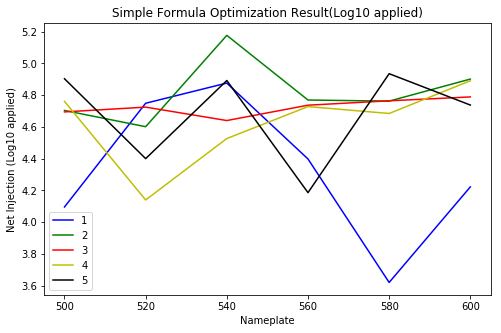

In [38]:
pl.figure(figsize=(8,5))
pl.plot(data['Nameplate'], data['Net Injection-1'], '-', c='b',label='1')
pl.plot(data['Nameplate'], data['Net Injection-2'], '-', c='g',label='2')
pl.plot(data['Nameplate'], data['Net Injection-3'], '-', c='r', label='3')
pl.plot(data['Nameplate'], data['Net Injection-4'], '-', c='y', label='4')
pl.plot(data['Nameplate'], data['Net Injection-5'], '-', c='black', label='5')

pl.xlabel('Nameplate')
pl.ylabel('Net Injection (Log10 applied)')
pl.title('Simple Formula Optimization Result(Log10 applied)')
pl.legend()